#Principal Component Analysis
Objectives:

At the end of this ICE, I will be able to develop intuitions about principal component analysis and implement the PCA algorithm for dimension reduction purposes.

Let's first start with a simple 2 dimension example with 200 random points that are roughly around  y = 1 + 2x



In [1]:
# Import the standard stuff
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

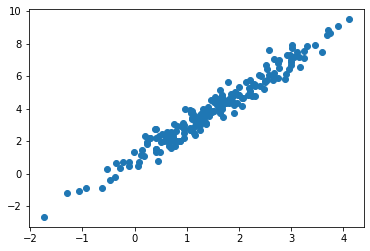

In [2]:
np.random.seed(123)

X = np.random.randn(200) + 1.5 ## Array of 200 values of x with means of 1 (by default) and sd of 1.5
res = 0.5 * np.random.randn(200) ## Generate 200 residuals with sd of 0.6
y = 1 + 2 * X + res

twoDData = np.c_[X,y]

plt.scatter(twoDData[:, 0], twoDData[:, 1])

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(twoDData)

PCA(n_components=2)

In [4]:
print(pca.components_)

[[-0.43316568 -0.90131431]
 [-0.90131431  0.43316568]]


In [5]:
print(pca.explained_variance_)

[5.75175781 0.04167795]


The two vectors in pca.components_ represent the principal axes of the data: one pointing to the lower left (i.e., -0.43, -0.90) and explaining a lot more variance (5.75) and another orthorgnal to the first axis and explaining much less variance (0.04). The projection of each data point onto the principal axes are the "principal components" of the data. By comparing the variance_explained, we can conclude that the first component is more important than the second one.

In [6]:
pca = PCA(n_components=1)
pca.fit(twoDData)
twoDData_dr = pca.transform(twoDData)
print("original shape:   ", twoDData.shape)
print("transformed shape:", twoDData_dr.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


#PCA for Dimension Reduction
The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

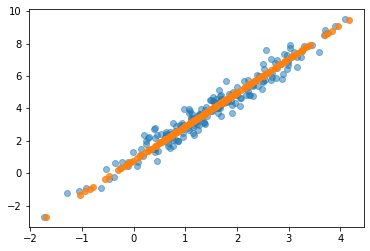

In [7]:
twoDData_new = pca.inverse_transform(twoDData_dr)
plt.scatter(twoDData[:, 0], twoDData[:, 1], alpha=0.5)
plt.scatter(twoDData_new[:, 0], twoDData_new[:, 1], alpha=0.8)

The blue points are the original data, while the organge points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

#PCA Example in an Intelligent Tutoring System
I will be using data from the Assistments Intelligent Tutoring system. This system gives students hints based on how they perform on math problems. We want to see if we can build a decision tree to help teachers decide which students to follow up with, based on students' performance in Assistments.

Here are the variables:

**id** - student id

**prior_prob_count** - The number of problems a student has done in the system prior to the current session

**prior_percent_correct** - The percentage of problems a student has answered correctly piror to the current session

**problems_attempted** - The number of problems a student has attempted in this current session

**mean_correct** - The percentage of correct problems in this currect session

**mean_hint** - The average number of hints the student requested in the current session
mean_attempt - The average attempts for each problem

**mean_confidence** - The reported confidence a student has reported at the end of the session

In [8]:
ICEdata = pd.read_csv("ICE6_Data.csv")
ICEdata

,id,prior_prob_count,prior_percent_correct,problems_attempted,mean_correct,mean_hint,mean_attempt,mean_confidence
0,172777,650,0.723077,4,1.000000,0.000000,1.000000,0.550159
1,175658,1159,0.800690,22,0.454545,2.227273,1.227273,0.437515
2,175669,1239,0.656981,11,0.636364,1.363636,1.727273,0.511060
3,176151,1246,0.729535,16,0.750000,0.562500,1.187500,0.491578
4,176165,1299,0.568129,6,0.333333,2.166667,2.000000,0.409887
...,...,...,...,...,...,...,...,...
337,253464,9,0.222222,23,0.782609,0.000000,1.347826,0.602103
338,253517,6,0.833333,16,0.562500,0.562500,2.062500,0.571269
339,255494,12,0.750000,3,0.666667,0.666667,1.333333,0.563379
340,256227,84,0.678571,3,0.333333,1.666667,1.333333,0.567501


In [9]:
ICEdata_noid = ICEdata.drop(['id'], axis = 1)
icepca = PCA(n_components=7)
icepca.fit(ICEdata_noid)

print("The principal components are:")
print(icepca.components_)
print("The explained variances are:")
print(icepca.explained_variance_)

The principal components are:
[[ 9.99998379e-01  3.25231653e-05  1.72229676e-03  6.65415156e-05
   4.97054823e-04  1.49367002e-04  1.15030348e-05]
 [-1.73541120e-03  1.03037706e-03  9.99602228e-01  2.30861751e-03
   2.23020180e-02  1.69662730e-02 -8.64582845e-04]
 [-3.87330335e-04 -3.27396081e-02 -2.70451869e-02 -1.24635620e-01
   6.73010236e-01  7.27812593e-01  2.92226368e-03]
 [ 2.29120283e-04  3.26414469e-02  3.68040760e-03  1.78860696e-01
  -7.05688901e-01  6.84765009e-01  5.46329794e-03]
 [ 1.63571033e-04 -1.96336169e-01  6.70115719e-03 -9.52166155e-01
  -2.19898499e-01  3.19977181e-02 -7.35362922e-02]
 [ 1.91456302e-05 -9.79282671e-01  7.60612436e-04  1.99617334e-01
  -2.17110326e-03 -7.96442781e-03  3.30097853e-02]
 [ 1.73255132e-06 -1.78647923e-02 -1.39538358e-03  7.74726598e-02
   1.42375081e-02  3.24800341e-03 -9.96726458e-01]]
The explained variances are:
[1.01909636e+05 9.65917304e+01 8.07223611e-01 4.21069102e-01
 4.13364216e-02 1.60996431e-02 1.08938450e-02]


From the explained variances, we can see that the first two components explaining substantially more variances than other components. So let's reduce the the data to two dimensions and plot it.

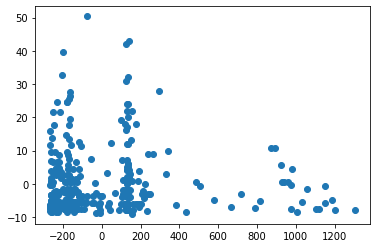

In [10]:
icedata_dr = icepca.transform(ICEdata_noid)
plt.scatter(icedata_dr[:,0], icedata_dr[:,1])

From the scatter plot, we can clearly see three clusters. Let's see if KMeans will help us to pick them up.

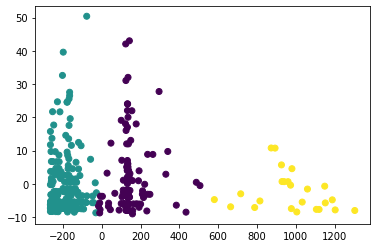

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(icedata_dr)
cluster_kmeans = kmeans.predict(icedata_dr)

plt.scatter(icedata_dr[:, 0], icedata_dr[:, 1], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters